In [ ]:
!pip install numdifftools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd

In [ ]:
z1 = np.random.normal(size=2)
z2 = np.random.normal(size=2)
z3 = np.random.normal(size=2)
z4 = np.random.normal(size=2)
z5 = np.random.normal(size=2)

In [ ]:
Z = np.array([z1, z2, z3, z4, z5])
print(Z.shape)
Z

(5, 2)


array([[ 0.2147064 , -0.78904189],
       [ 0.86109995,  1.2997749 ],
       [ 0.18175281,  1.58210896],
       [ 0.64855977, -0.48651213],
       [-1.78018992, -0.53748183]])

In [ ]:
M = Z @ Z.T
M

array([[ 0.66868594, -0.84069317, -1.20932675,  0.52312838,  0.04187751],
       [-0.84069317,  2.4309079 ,  2.21289284, -0.07388146, -2.23152683],
       [-1.20932675,  2.21289284,  2.53610284, -0.65183763, -1.17390934],
       [ 0.52312838, -0.07388146, -0.65183763,  0.65732382, -0.89306814],
       [ 0.04187751, -2.23152683, -1.17390934, -0.89306814,  3.45796287]])

In [ ]:
w1 = np.random.normal(size=4)
w2 = np.random.normal(size=4)
w3 = np.random.normal(size=4)
w4 = np.random.normal(size=4)
w5 = np.random.normal(size=4)

W = np.array([w1, w2, w3, w4, w5])
print(W.shape)
W

(5, 4)


array([[-0.41272415, -0.20925735,  0.67485795, -1.80092799],
       [ 1.37841403,  0.08474182, -0.78650526, -0.27259039],
       [-0.98517393,  0.36016848,  1.12332149,  0.78770817],
       [-0.15016367, -0.11558697, -0.68439211, -1.13411062],
       [ 1.01008216,  0.83206255, -0.36391273, -0.48623953]])

In [ ]:
zeros = np.zeros(10).reshape((5,2))
X0 = np.append(Z, zeros, axis=1)
print(X0.shape)
X0

(5, 4)


array([[ 0.2147064 , -0.78904189,  0.        ,  0.        ],
       [ 0.86109995,  1.2997749 ,  0.        ,  0.        ],
       [ 0.18175281,  1.58210896,  0.        ,  0.        ],
       [ 0.64855977, -0.48651213,  0.        ,  0.        ],
       [-1.78018992, -0.53748183,  0.        ,  0.        ]])

In [ ]:
X0 = X0 + W
X0

array([[-0.19801775, -0.99829923,  0.67485795, -1.80092799],
       [ 2.23951397,  1.38451671, -0.78650526, -0.27259039],
       [-0.80342111,  1.94227743,  1.12332149,  0.78770817],
       [ 0.4983961 , -0.6020991 , -0.68439211, -1.13411062],
       [-0.77010776,  0.29458072, -0.36391273, -0.48623953]])

In [ ]:
def f(X):
  return np.linalg.norm((X @ X.T) - M) ** 2

def grad_f(X):
  return 2 * (X@X.T - M)@X + 2 * (X@X.T + -M.T)@X

In [ ]:
errorBound = 10**-8
X = X0
a = 2 * 10**-4
PrecGD_iterates = []
PrecGD_functionValues = []

while f(X) > errorBound:
  PrecGD_iterates.append(X)
  PrecGD_functionValues.append(f(X))
  eta = np.sqrt(f(X))
  X = X - (a * grad_f(X).reshape((5,4))) @ np.linalg.inv((X.T @ X + eta * np.eye(4)))

PrecGD_iterates.append(X)
PrecGD_functionValues.append(f(X))

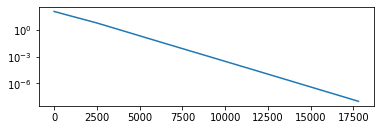

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
plt.plot(PrecGD_functionValues)
ax.set_yscale('log')
plt.show()

In [ ]:
errorBound = 10**-8
X = X0
a = 2 * 10**-4
PrecGD_max_iterates = []
PrecGD_max_functionValues = []

while f(X) > errorBound:
  PrecGD_max_iterates.append(X)
  PrecGD_max_functionValues.append(f(X))
  eta = max(f(X), f(X)**(1/4))
  X = X - (a * grad_f(X).reshape((5,4))) @ np.linalg.inv((X.T @ X + eta * np.eye(4)))

PrecGD_max_iterates.append(X)
PrecGD_max_functionValues.append(f(X))

In [ ]:
errorBound = 10**-8
X = X0
a = 2 * 10**-4
PrecGD_min_iterates = []
PrecGD_min_functionValues = []

while f(X) > errorBound:
  PrecGD_min_iterates.append(X)
  PrecGD_min_functionValues.append(f(X))
  eta = min(f(X), f(X)**(1/4))
  X = X - (a * grad_f(X).reshape((5,4))) @ np.linalg.inv((X.T @ X + eta * np.eye(4)))

PrecGD_min_iterates.append(X)
PrecGD_min_functionValues.append(f(X))

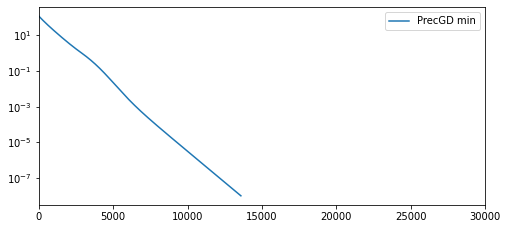

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(2,1,1)
plt.plot(PrecGD_min_functionValues, label="PrecGD min")
plt.legend()
ax.set_yscale('log')
plt.xlim([0,30000])
plt.show()

In [ ]:
errorBound = 10**-8
X = X0
a = 2 * 10**-4
GD_iterates = []
GD_functionValues = []

while f(X) > errorBound:
  GD_iterates.append(X)
  GD_functionValues.append(f(X))
  X = X - a * grad_f(X)

GD_iterates.append(X)
GD_functionValues.append(f(X))

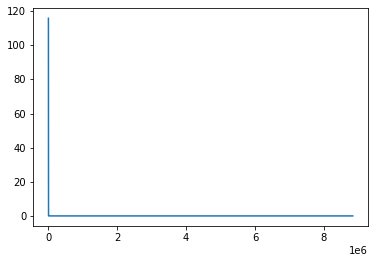

In [ ]:
plt.plot(GD_functionValues)

In [ ]:
errorBound = 10**-8
X = X0
a = 2 * 10**-2
ScaledGD_iterates = []
ScaledGD_functionValues = []

while f(X) > errorBound:
  ScaledGD_iterates.append(X)
  ScaledGD_functionValues.append(f(X))
  X = X - a * grad_f(X) @ np.linalg.inv(X.T @ X)

ScaledGD_iterates.append(X)
ScaledGD_functionValues.append(f(X))

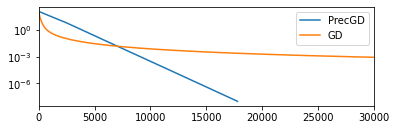

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
plt.plot(PrecGD_functionValues, label="PrecGD")
plt.plot(GD_functionValues, label="GD")
plt.legend()
ax.set_yscale('log')
plt.xlim([0,30000])
plt.show()

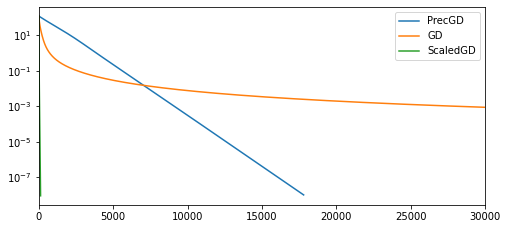

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(2,1,1)
plt.plot(PrecGD_functionValues, label="PrecGD")
plt.plot(GD_functionValues, label="GD")
plt.plot(ScaledGD_functionValues, label="ScaledGD")
plt.legend()
ax.set_yscale('log')
plt.xlim([0,30000])
plt.show()

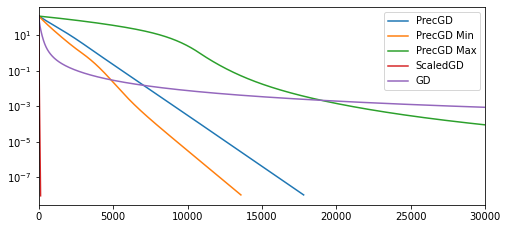

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(2,1,1)
plt.plot(PrecGD_functionValues, label="PrecGD")
plt.plot(PrecGD_min_functionValues, label="PrecGD Min")
plt.plot(PrecGD_max_functionValues, label="PrecGD Max")
plt.plot(ScaledGD_functionValues, label="ScaledGD")
plt.plot(GD_functionValues, label="GD")
plt.xlim([0,30000])
plt.legend()
ax.set_yscale('log')
plt.show()

In [ ]:
len(ScaledGD_iterates)
ScaledGD_functionValues[-1]

8.895831885413717e-09